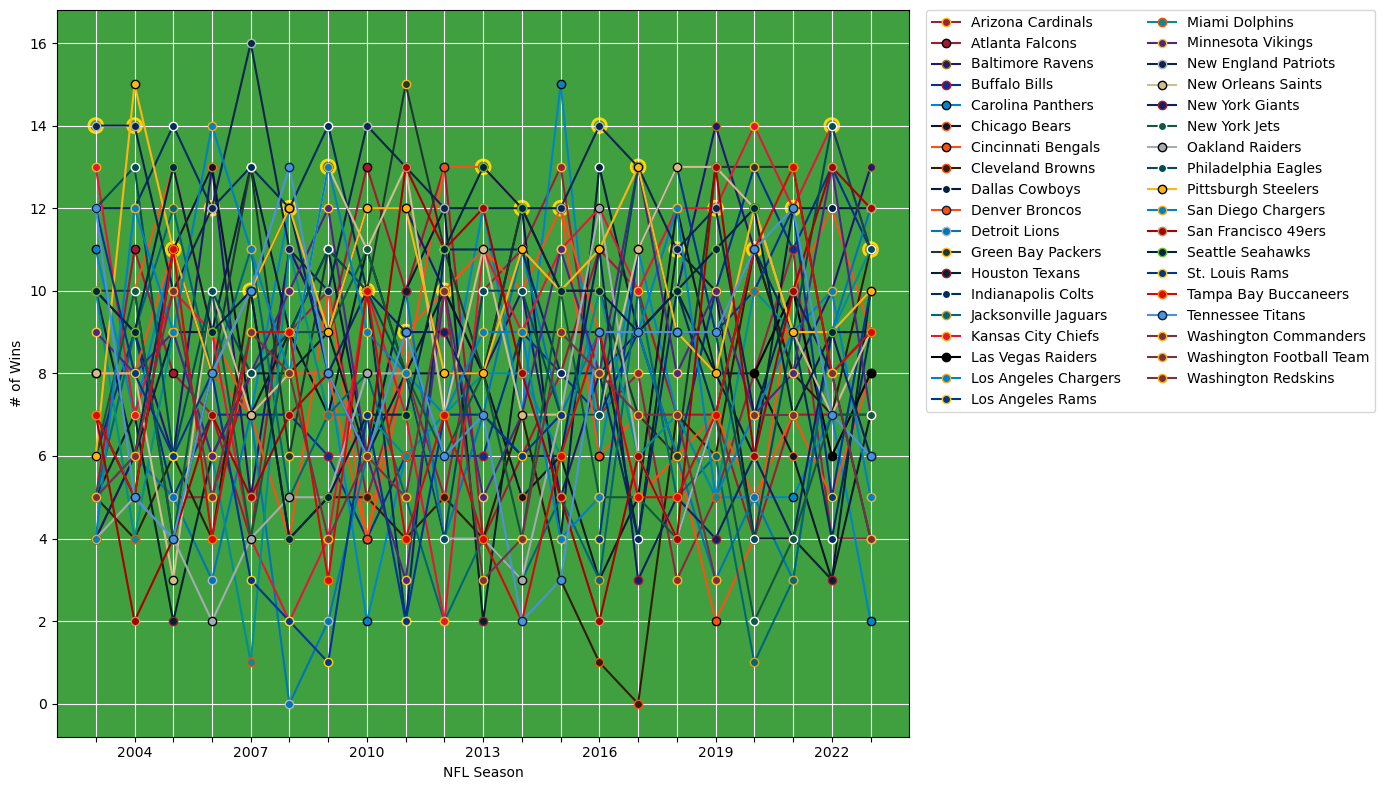

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# loaded data from the .csv I'm using to graph
data = pd.read_csv('nfl_team_stats_2003_2023.csv')

# All of the methods I've used came from the matplotlib documentation and work we've done in class
# https://matplotlib.org/stable/index.html


# Group data by team and year, then calculate total wins for each year
yearly_wins = data.groupby(['year', 'team'])['wins'].sum().unstack()

# I made a dictionary to set a unique team color for each team. The color picked is based off their primary color
team_colors = {
    'Arizona Cardinals': '#97233F',
    'Atlanta Falcons': '#A71930',
    'Baltimore Ravens': '#241773',
    'Buffalo Bills': '#00338D',
    'Carolina Panthers': '#0085CA',
    'Chicago Bears': '#0B162A',
    'Cincinnati Bengals': '#FB4F14',
    'Cleveland Browns': '#311D00',
    'Dallas Cowboys': '#041E42',
    'Denver Broncos': '#FB4F14',
    'Detroit Lions': '#0076B6',
    'Green Bay Packers': '#203731',
    'Houston Texans': '#03202F',
    'Indianapolis Colts': '#002C5F',
    'Jacksonville Jaguars': '#006778',
    'Kansas City Chiefs': '#E31837',
    'Las Vegas Raiders': '#000000',
    'Los Angeles Chargers': '#0080C6',
    'Los Angeles Rams': '#003594',
    'Miami Dolphins': '#008E97',
    'Minnesota Vikings': '#4F2683',
    'New England Patriots': '#0D254C',
    'New Orleans Saints': '#D3BC8D',
    'New York Giants': '#0B2265',
    'New York Jets': '#125740',
    'Oakland Raiders': '#A5ACAF',
    'Philadelphia Eagles': '#004C54',
    'Pittsburgh Steelers': '#FFB612',
    'San Francisco 49ers': '#AA0000',
    'San Diego Chargers': '#0080C6',
    'Seattle Seahawks': '#002244',
    'St. Louis Rams': '#003594',
    'Tampa Bay Buccaneers': '#D50A0A',
    'Tennessee Titans': '#4B92DB',
    'Washington Commanders': '#773141',
    'Washington Redskins': '#773141',
    'Washington Football Team': '#773141'
}

# I made a 2nd dictionary to store a unique outline color for the lines of each team. This color is based off the team's secondary color
team_outline_colors = {
    'Arizona Cardinals': '#FFB612',
    'Atlanta Falcons': '#000000',
    'Baltimore Ravens': '#9E7C0C',
    'Buffalo Bills': '#C60C30',
    'Carolina Panthers': '#000000',
    'Chicago Bears': '#F26522',
    'Cincinnati Bengals': '#000000',
    'Cleveland Browns': '#FB4F14',
    'Dallas Cowboys': '#FFFFFF',
    'Denver Broncos': '#002244',
    'Detroit Lions': '#B0B7BC',
    'Green Bay Packers': '#FFB612',
    'Houston Texans': '#A71930',
    'Indianapolis Colts': '#FFFFFF',
    'Jacksonville Jaguars': '#D7A221',
    'Kansas City Chiefs': '#FFB612',
    'Las Vegas Raiders': '#000000',
    'Los Angeles Chargers': '#EEAD1E',
    'Los Angeles Rams': '#FFD100',
    'Miami Dolphins': '#FC4C02',
    'Minnesota Vikings': '#FFC62F',
    'New England Patriots': '#B0B7BC',
    'New Orleans Saints': '#000000',
    'New York Giants': '#A71930',
    'New York Jets': '#FFFFFF',
    'Oakland Raiders': '#000000',
    'Philadelphia Eagles': '#FFFFFF',
    'Pittsburgh Steelers': '#000000',
    'San Francisco 49ers': '#B3995D',
    'San Diego Chargers': '#EEAD1E',
    'Seattle Seahawks': '#69BE28',
    'St. Louis Rams': '#FFD100',
    'Tampa Bay Buccaneers': '#FF7900',
    'Tennessee Titans': '#002244',
    'Washington Commanders': '#FFB612',
    'Washington Redskins': '#FFB612',
    'Washington Football Team': '#FFB612'
}

# I also made a dictionary to show who won the championship of each year in the dataset since it wasn't initially included in the dataset and I wanted to visualize it.
super_bowl_winners = {
    2003: "New England Patriots",
    2004: "New England Patriots",
    2005: "Pittsburgh Steelers",
    2006: "Indianapolis Colts",
    2007: "New York Giants",
    2008: "Pittsburgh Steelers",
    2009: "New Orleans Saints",
    2010: "Green Bay Packers",
    2011: "New York Giants",
    2012: "Baltimore Ravens",
    2013: "Seattle Seahawks",
    2014: "New England Patriots",
    2015: "Denver Broncos",
    2016: "New England Patriots",
    2017: "Philadelphia Eagles",
    2018: "New England Patriots",
    2019: "Kansas City Chiefs",
    2020: "Tampa Bay Buccaneers",
    2021: "Los Angeles Rams",
    2022: "Kansas City Chiefs",
    2023: "Kansas City Chiefs"
}

# Function to plot team data
def plot_teams(data, ax):
    plotted_teams = set() 
    
    # for loop to run through each team in the dataset plot them and get their primary and outline colors
    # and see if they won the super bowl in a given year
    for team in data.columns:
        if team not in plotted_teams:
            primary_color = team_colors.get(team, 'black')
            outline_color = team_outline_colors.get(team, 'white') 
            ax.plot(data.index, data[team], marker='o', color=primary_color, label=team, markeredgecolor=outline_color) 
            plotted_teams.add(team) 
            if team in super_bowl_winners.values():
                winner_years = [year for year, winner in super_bowl_winners.items() if winner == team]
                for year in winner_years:
                    wins = data.loc[year, team]
                    ax.scatter(year, wins, marker='o', color='none', edgecolors='gold', s=100, linewidths=2)
                    
    # added the legend outside of the graph                
    ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0, ncol=2)
    
     # I decided to make the background white and grid lines white as to mimic an actual football field
    ax.grid(True, color='white')
    ax.set_facecolor((0, 0.5019607843137255, 0, 0.75))
    
    # I then set the axis labels and tick positions
    ax.set_xticks(range(2003, 2024)) 
    ax.set_xticklabels([str(year) if year % 3 == 0 else '' for year in range(2003, 2024)])
    ax.set_xlabel('NFL Season')
    ax.set_ylabel('# of Wins')

    
# And this is the code to actually plot the graph
fig, ax = plt.subplots(figsize=(14, 8))
plot_teams(yearly_wins, ax)
plt.tight_layout()
#savefig method is to save and export the final result to get as a .png file
plt.savefig('INFSCI_1520_Final_ForReal.png')  
plt.show()